# Decision Tree Worksheet

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [19]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
df = pd.read_csv(url, names = names)

print(df)

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[y_col], test_size = test_size, random_state=0)  

# further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = test_size, random_state=0)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [13]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None, max_depth=10, min_samples_leaf=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print accuracy of training and validation data.

In [14]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  90.4276985743381
Validation Accuracy is  72.35772357723577


Make a model with a low max-depth and higher minimum sample leafs.

In [15]:
## YOUR CODE HERE
decision_tree2 = DecisionTreeClassifier(criterion = "entropy", random_state = None, max_depth=3, min_samples_leaf=10)
decision_tree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print accuracy of training and validation data.

In [16]:
## YOUR CODE HERE
y_train_pred=decision_tree2.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree2.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  78.41140529531569
Validation Accuracy is  72.35772357723577


Explain the accuracy results below. 

(YOUR ANSWER HERE)

The first decision tree (decision_tree) had better training and validation accuracy because it had more nodes that it could use to "split" the data. This is because of the max_depth argument; when high, it can increase accuracy, but has risk of overfitting. Likewise, the min_samples_leaf being very high in decision_tree2 would decrease accuracy, because it doesn't split the data into categories as well.

## Metrics

Plot the ROC curve and print the AUC of the second model.

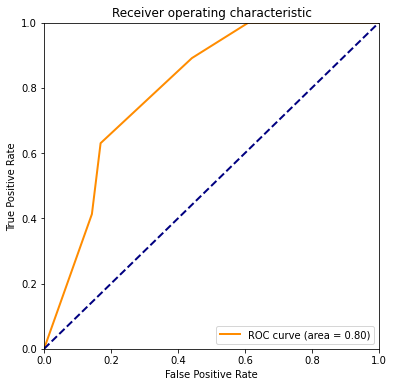

AUC curve (area = 0.80)


In [23]:
## YOUR CODE HERE
labels = [0,1]
y_val_prob = decision_tree2.predict_proba(X_val,labels)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC curve (area = %0.2f)" % roc_auc)

Use graphviz to visualize your 2nd tree.

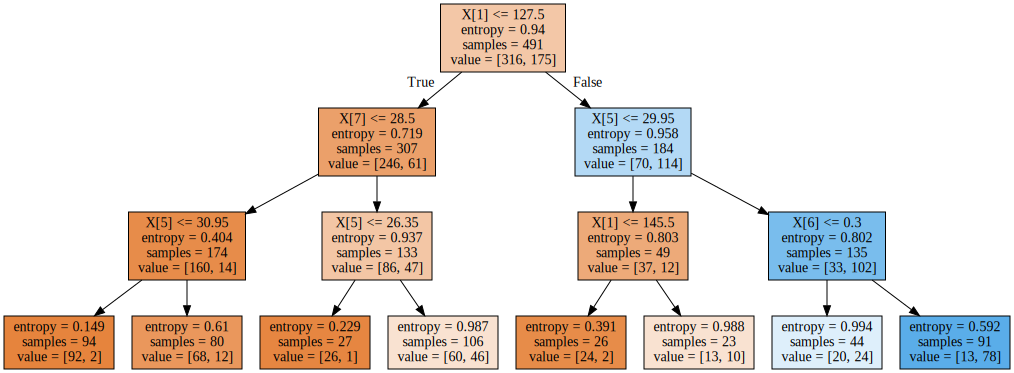

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree2, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

(YOUR ANSWER HERE)

I think X[n] represents the column value. So if n = 5, it would be the referring to the 5th column.

Question 2: What is the root feature? Does it make sense as the root feature?

(YOUR ANSWER HERE)

The root feature is plas. This makes sense as it has lots of variation, so it would be good to split it there, because it would make a good first divide.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

(YOUR ANSWER HERE)

I think that the training accuracy would be 100 because the tree would match very well with the data, but the validation accuracy and test accuracy would be very low because of overfitting

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [20]:
## YOUR CODE HERE
decision_tree3 = DecisionTreeClassifier(criterion = "entropy", random_state = None, max_depth=500, min_samples_leaf=1)
decision_tree3.fit(X_train, y_train)

y_train_pred=decision_tree3.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree3.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  64.22764227642277


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [25]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Print accuracy of training and validation data.

In [26]:
## YOUR CODE HERE
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  75.60975609756098


How did the accuracy compare to the decision tree's accuracy?

(YOUR ANSWER HERE)

Both accuracies are higher, but the training accuracy of 100 seems a little suspicious...

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [32]:
## YOUR CODE HERE
importances = random_forest.feature_importances_

featureImportances = pd.DataFrame(random_forest.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

print(featureImportances[:3])

      importance
plas    0.241831
mass    0.183550
age     0.140445


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

In [27]:
## YOUR CODE HERE
accs = []

for i in range(1, 100, 5):
  forest = RandomForestClassifier(n_estimators=100)
  forest.fit(X_train, y_train)
  y_val_pred=forest.predict(X_val)
  accs.append(accuracy_score(y_val, y_val_pred) * 100)

print(accs)


[80.48780487804879, 73.98373983739837, 75.60975609756098, 78.86178861788618, 75.60975609756098, 76.42276422764228, 77.23577235772358, 75.60975609756098, 74.79674796747967, 77.23577235772358, 74.79674796747967, 77.23577235772358, 77.23577235772358, 75.60975609756098, 76.42276422764228, 77.23577235772358, 73.17073170731707, 74.79674796747967, 78.86178861788618, 78.04878048780488]


Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

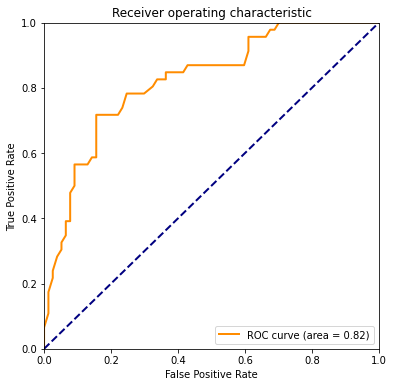

AUC curve (area = 0.82)


In [35]:
## YOUR CODE HERE
labels = [0,1]
y_val_prob = random_forest.predict_proba(X_val)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC curve (area = %0.2f)" % roc_auc)